# PSTH & Raster Plot Analysis

- `spikes.csv` - Spike times in seconds
- `pico_time_adjust.csv` - Interval times in seconds (Conversion Script in 1_PreProcessing)

## Parameters:
- **unit**: Which unit to plot (e.g., 28, 10, 7, etc.)
- **duration**: Interval duration to analyze in ms (25ms, 10ms, 5ms)
- **bin_size_ms**: Number of milliseconds per bin for PSTH
- **start_time/end_time**: Time frame for trials in seconds (optional)
- **max_trials**: Maximum number of trials to plot (optional, ignored if trial_ranges used)
- **pre_interval_ms/post_interval_ms**: Time padding before/after intervals in ms
- **smooth_window**: Number of bins for smoothing PSTH (optional, e.g. 3, 5, 10)
- **trial_ranges**: Specific trial ranges to plot, e.g. [(100, 200), (600, 700)] (optional)
- **save**: Save PSTH and raster plots to Output_Path
- **output_path**: Path to save 

In [4]:
# Import the analysis module
import sys
sys.path.append('.')

# Reload the module to get latest changes
import importlib
if 'psth_raster_analysis' in sys.modules:
    importlib.reload(sys.modules['psth_raster_analysis'])

from psth_raster_analysis import run_psth_analysis
import matplotlib.pyplot as plt

In [2]:
# Check if data files exist
import os

spikes_file = os.path.abspath('../../Data/spikes.csv')
intervals_file = os.path.abspath('../../Data/pico_time_adjust.csv')

if os.path.exists(spikes_file) and os.path.exists(intervals_file):
    print("✓ All data files found!")
else:
    print("✗ Some data files are missing!")

✓ All data files found!


PSTH & RASTER ANALYSIS
Unit: 3
Duration: 10ms
Bin size: 0.6ms
Max trials: 10000
Pre-interval: 5ms
Post-interval: 10ms
Smoothing window: 5 bins
------------------------------------------------------------
Loading spike data from: /home/wanglab/spike-analysis/Data/spikes.csv
Loading interval data from: /home/wanglab/spike-analysis/Data/pico_time_adjust.csv
Loaded 290775 spikes and 28336 intervals
Available units: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.in

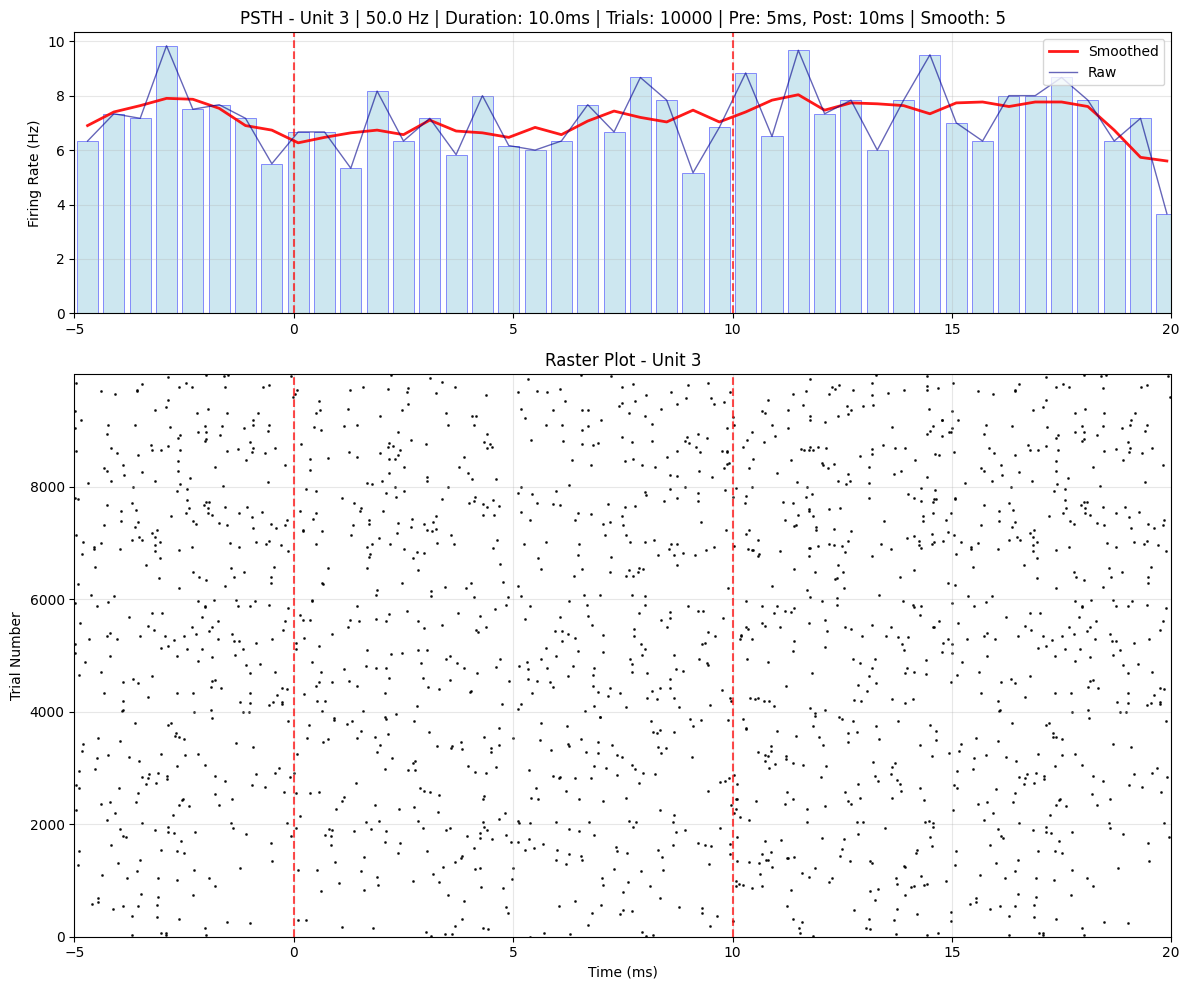

In [5]:
# Set your parameters here
unit = 3                  # Which unit to analyze
duration = 10             # Interval duration in ms (25ms, 10ms, 5ms)
bin_size_ms = 0.6         # Bin size in milliseconds
start_time = None         # Start time for filtering in seconds (optional)
end_time = None           # End time for filtering in seconds (optional)
max_trials = 10000          # Maximum trials to plot (ignored if trial_ranges used)
pre_interval_ms = 5       # Milliseconds before interval to include
post_interval_ms = 10     # Milliseconds after interval to include
smooth_window = 5         # Number of bins for smoothing (None for no smoothing)
trial_ranges = None #[(0, 200), (1200, 1500), (4200, 4300), (4800, 4900)]  # Specific trial ranges (None for all/max_trials)
save = True                    # Whether to save plots to file
output_path = "/home/wanglab/spike-analysis/Output/040425"  # Directory to save plots

# Run analysis
fig, trial_data = run_psth_analysis(
    unit=unit,
    duration=duration, 
    bin_size_ms=bin_size_ms,
    start_time=start_time,
    end_time=end_time,
    max_trials=max_trials,
    pre_interval_ms=pre_interval_ms,
    post_interval_ms=post_interval_ms,
    smooth_window=smooth_window,
    trial_ranges=trial_ranges,
    save=save,
    output_path=output_path
)

if fig:
    plt.show()
else:
    print("No data found for analysis!")

In [ ]:
units = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]        # List of units to analyze
duration = 10                   # Interval duration in ms (25ms, 10ms, 5ms)
bin_size_ms = 0.6              # Bin size in milliseconds
start_time = None              # Start time for filtering in seconds (optional)
end_time = None                # End time for filtering in seconds (optional)
max_trials = 10000             # Maximum trials to plot (ignored if trial_ranges used)
pre_interval_ms = 5            # Milliseconds before interval to include
post_interval_ms = 10          # Milliseconds after interval to include
smooth_window = 5              # Number of bins for smoothing (None for no smoothing)
trial_ranges = None            # Specific trial ranges (None for all/max_trials)
save = True                    # Whether to save plots to file
output_path = "/home/wanglab/spike-analysis/Output/040425"  # Directory to save plots

# Run analysis for multiple units
results = run_psth_analysis(
    unit=units,  # Pass list of units
    duration=duration, 
    bin_size_ms=bin_size_ms,
    start_time=start_time,
    end_time=end_time,
    max_trials=max_trials,
    pre_interval_ms=pre_interval_ms,
    post_interval_ms=post_interval_ms,
    smooth_window=smooth_window,
    trial_ranges=trial_ranges,
    save=save,
    output_path=output_path  # Make sure to pass the output_path parameter
)

# Display all plots (optional when saving)
if results:
    for i, (fig, trial_data) in enumerate(results):
        if fig:
            print(f"\n--- Unit {units[i]} ---")
            if not save:  # Only show plots if not saving (to avoid cluttering)
                plt.show()
        else:
            print(f"No data found for Unit {units[i]}!")
else:
    print("No results generated!")

PSTH & RASTER ANALYSIS - MULTIPLE UNITS: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]

--- Processing Unit 1 ---
PSTH & RASTER ANALYSIS
Unit: 1
Duration: 10ms
Bin size: 0.6ms
Max trials: 10000
Pre-interval: 5ms
Post-interval: 10ms
Smoothing window: 5 bins
------------------------------------------------------------
Loading spike data from: /home/wanglab/spike-analysis/Data/spikes.csv
Loading interval data from: /home/wanglab/spike-analysis/Data/pico_time_adjust.csv
Loaded 290775 spikes and 28336 intervals
Available units: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.

/home/wanglab/spike-analysis/Full_Pipeline/3_PSTH/psth_raster_analysis.py:193: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10),


Created plot with 10000 trials
Total spikes: 6635
Average firing rate: 26.54 Hz
Saved plot to: /home/wanglab/spike-analysis/Output/040425/psth_raster_unit_21_dur_10ms_bin_0.6ms_pre5_post10_smooth5_max10000.png

--- Processing Unit 22 ---
PSTH & RASTER ANALYSIS
Unit: 22
Duration: 10ms
Bin size: 0.6ms
Max trials: 10000
Pre-interval: 5ms
Post-interval: 10ms
Smoothing window: 5 bins
------------------------------------------------------------
Loading spike data from: /home/wanglab/spike-analysis/Data/spikes.csv
Loading interval data from: /home/wanglab/spike-analysis/Data/pico_time_adjust.csv
Loaded 290775 spikes and 28336 intervals
Available units: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.i